In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# create a set of random latitude and longitude combinations
lats = np.random.uniform(-90.000, 90.000, size=1500)
lngs = np.random.uniform(-180.000, 180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# add the latitude and longitude to a list
coordinates = list(lat_lngs)
coordinates

[(60.57216166603308, -3.137129664549093),
 (37.22883777106672, -37.745816325867025),
 (-81.24871024948283, 30.8123364225315),
 (-17.010101307200514, 86.88985692568633),
 (-78.14826929447585, -155.98704792962798),
 (25.754239845130755, -124.69567192296435),
 (-77.46686352634342, 91.47701373007766),
 (-15.424547285683616, 81.78705577170092),
 (-56.81652698575628, -118.52436132774702),
 (36.76361189200236, 0.6425088268984211),
 (16.03775642407149, -27.246770588129294),
 (-32.147451034917665, 39.978938189566776),
 (22.733996251938848, 138.50191815275912),
 (-86.2432829925626, -39.575217870935205),
 (-10.745030749026654, 111.04130195011265),
 (-47.69491369522336, 135.89757272043926),
 (-23.946619394685555, 19.11208130549639),
 (-61.151243921557764, 48.15893567992549),
 (-45.83763057529589, -92.46814262689176),
 (65.52992153976518, 71.31905675953954),
 (32.19588983942387, 18.929194157910388),
 (-68.3427927205998, 37.434131532851836),
 (77.57973872174588, 57.27866996316337),
 (-66.95868597958

In [4]:
# import citipy module
from citipy import citipy

In [5]:
# create a list for holding the cities
cities = []
# identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # if the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
# print the city count to confirm sufficient count
len(cities)

612

In [6]:
# import the requests library
import requests

# import the API key
from config import weather_api_key

In [7]:
# starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# declare empty list to hold weather data
city_data = []

# print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# create counters
record_count = 1
set_count = 1

# loop through all cities in our list
for i, city in enumerate(cities):
    
    # group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count}) | {city}")
    # add 1 to the record count
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1) | kirkwall
Processing Record 2 of Set 1) | ribeira grande
Processing Record 3 of Set 1) | port elizabeth
Processing Record 4 of Set 1) | bengkulu
Processing Record 5 of Set 1) | mataura
Processing Record 6 of Set 1) | lompoc
Processing Record 7 of Set 1) | busselton
Processing Record 8 of Set 1) | hithadhoo
Processing Record 9 of Set 1) | rikitea
Processing Record 10 of Set 1) | sidi ali
Processing Record 11 of Set 1) | porto novo
Processing Record 12 of Set 1) | richards bay
Processing Record 13 of Set 1) | naze
Processing Record 14 of Set 1) | ushuaia
Processing Record 15 of Set 1) | boyolangu
Processing Record 16 of Set 1) | portland
Processing Record 17 of Set 1) | aranos
Processing Record 18 of Set 1) | east london
Processing Record 19 of Set 1) | castro
Processing Record 20 of Set 1) | nadym
Processing Record 21 of Set 1) | benghazi
Processing Record 22 of Set 1) | port alfred
Processing Rec

Processing Record 34 of Set 4) | provideniya
Processing Record 35 of Set 4) | tuktoyaktuk
Processing Record 36 of Set 4) | sydney
Processing Record 37 of Set 4) | qaanaaq
Processing Record 38 of Set 4) | rawson
Processing Record 39 of Set 4) | norman wells
Processing Record 40 of Set 4) | palmer
Processing Record 41 of Set 4) | kidal
Processing Record 42 of Set 4) | binzhou
Processing Record 43 of Set 4) | havelock
Processing Record 44 of Set 4) | synya
Processing Record 45 of Set 4) | gawler
Processing Record 46 of Set 4) | hami
Processing Record 47 of Set 4) | bredasdorp
Processing Record 48 of Set 4) | meulaboh
Processing Record 49 of Set 4) | constitucion
Processing Record 50 of Set 4) | broome
Processing Record 1 of Set 5) | tabora
Processing Record 2 of Set 5) | tonstad
Processing Record 3 of Set 5) | tiksi
Processing Record 4 of Set 5) | pacific grove
Processing Record 5 of Set 5) | osakarovka
Processing Record 6 of Set 5) | hede
Processing Record 7 of Set 5) | cidreira
Processi

Processing Record 22 of Set 8) | sumbawa
City not found. Skipping...
Processing Record 23 of Set 8) | murray bridge
Processing Record 24 of Set 8) | tarudant
City not found. Skipping...
Processing Record 25 of Set 8) | pathein
Processing Record 26 of Set 8) | saint anthony
Processing Record 27 of Set 8) | jibuti
Processing Record 28 of Set 8) | cherskiy
Processing Record 29 of Set 8) | ouadda
Processing Record 30 of Set 8) | moree
Processing Record 31 of Set 8) | hofn
Processing Record 32 of Set 8) | romanovskaya
Processing Record 33 of Set 8) | aklavik
Processing Record 34 of Set 8) | bloemfontein
Processing Record 35 of Set 8) | raga
Processing Record 36 of Set 8) | gorontalo
Processing Record 37 of Set 8) | fukue
Processing Record 38 of Set 8) | pangnirtung
Processing Record 39 of Set 8) | ternate
Processing Record 40 of Set 8) | dunmore town
Processing Record 41 of Set 8) | rocha
Processing Record 42 of Set 8) | ahumada
City not found. Skipping...
Processing Record 43 of Set 8) | f

Processing Record 3 of Set 12) | satitoa
City not found. Skipping...
Processing Record 4 of Set 12) | noumea
Processing Record 5 of Set 12) | tavda
Processing Record 6 of Set 12) | ambon
Processing Record 7 of Set 12) | kharitonovo
Processing Record 8 of Set 12) | flin flon
Processing Record 9 of Set 12) | lata
Processing Record 10 of Set 12) | tanshui
City not found. Skipping...
Processing Record 11 of Set 12) | altamira
Processing Record 12 of Set 12) | kaka
Processing Record 13 of Set 12) | louisbourg
City not found. Skipping...
Processing Record 14 of Set 12) | rutul
Processing Record 15 of Set 12) | poum
Processing Record 16 of Set 12) | whitehorse
Processing Record 17 of Set 12) | tondano
Processing Record 18 of Set 12) | karauzyak
City not found. Skipping...
Processing Record 19 of Set 12) | westport
Processing Record 20 of Set 12) | zhuhai
Processing Record 21 of Set 12) | sento se
City not found. Skipping...
Processing Record 22 of Set 12) | pemberton
Processing Record 23 of S

In [10]:
len(city_data)

558

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kirkwall,58.98,-2.96,60.80,82,45,21.92,GB,2020-08-20 19:34:24
1,Ribeira Grande,38.52,-28.70,75.20,88,40,11.41,PT,2020-08-20 19:34:24
2,Port Elizabeth,-33.92,25.57,57.20,93,97,8.05,ZA,2020-08-20 19:34:25
3,Bengkulu,-3.80,102.27,76.12,83,64,5.01,ID,2020-08-20 19:34:25
4,Mataura,-46.19,168.86,46.00,98,100,1.01,NZ,2020-08-20 19:34:25
5,Lompoc,34.64,-120.46,71.60,60,90,16.11,US,2020-08-20 19:34:25
6,Busselton,-33.65,115.33,41.00,82,0,6.22,AU,2020-08-20 19:34:25
7,Hithadhoo,-0.60,73.08,83.61,69,81,2.75,MV,2020-08-20 19:31:33
8,Rikitea,-23.12,-134.97,67.95,81,94,24.49,PF,2020-08-20 19:31:45
9,Sidi Ali,36.10,0.42,78.15,67,89,4.05,DZ,2020-08-20 19:34:26


In [12]:
# reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df.head(15)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kirkwall,GB,2020-08-20 19:34:24,58.98,-2.96,60.80,82,45,21.92
1,Ribeira Grande,PT,2020-08-20 19:34:24,38.52,-28.70,75.20,88,40,11.41
2,Port Elizabeth,ZA,2020-08-20 19:34:25,-33.92,25.57,57.20,93,97,8.05
3,Bengkulu,ID,2020-08-20 19:34:25,-3.80,102.27,76.12,83,64,5.01
4,Mataura,NZ,2020-08-20 19:34:25,-46.19,168.86,46.00,98,100,1.01
5,Lompoc,US,2020-08-20 19:34:25,34.64,-120.46,71.60,60,90,16.11
6,Busselton,AU,2020-08-20 19:34:25,-33.65,115.33,41.00,82,0,6.22
7,Hithadhoo,MV,2020-08-20 19:31:33,-0.60,73.08,83.61,69,81,2.75
8,Rikitea,PF,2020-08-20 19:31:45,-23.12,-134.97,67.95,81,94,24.49
9,Sidi Ali,DZ,2020-08-20 19:34:26,36.10,0.42,78.15,67,89,4.05


In [13]:
# create the output file (csv)
output_data_file = "weather_data/cities.csv"

# export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# use new df
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Kirkwall,GB,2020-08-20 19:34:24,58.98,-2.96,60.80,82,45,21.92
1,1,Ribeira Grande,PT,2020-08-20 19:34:24,38.52,-28.70,75.20,88,40,11.41
2,2,Port Elizabeth,ZA,2020-08-20 19:34:25,-33.92,25.57,57.20,93,97,8.05
3,3,Bengkulu,ID,2020-08-20 19:34:25,-3.80,102.27,76.12,83,64,5.01
4,4,Mataura,NZ,2020-08-20 19:34:25,-46.19,168.86,46.00,98,100,1.01


In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'08/20/20'

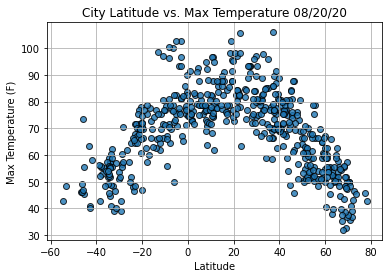

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/fig1.png")

# Show plot.
plt.show()

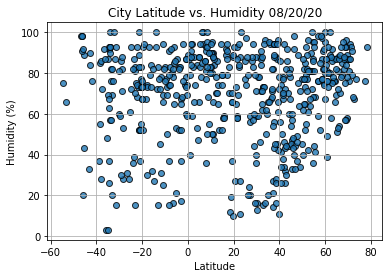

In [18]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/fig2.png")

# Show plot.
plt.show()

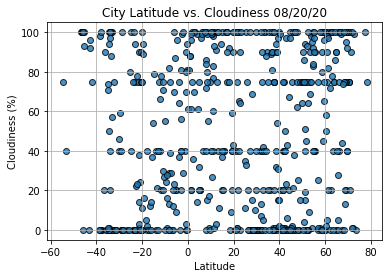

In [19]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/fig3.png")

# Show plot.
plt.show()

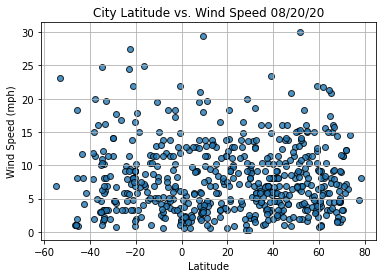

In [20]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/fig4.png")

# Show plot.
plt.show()

In [21]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [22]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # perform linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the x and y values.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    print(linregress(x_values, y_values))

In [23]:
index13 = city_data_df.loc[13]
index13

City_ID                        13
City                      Ushuaia
Country                        AR
Date          2020-08-20 19:31:22
Lat                         -54.8
Lng                         -68.3
Max Temp                     42.8
Humidity                       75
Cloudiness                     75
Wind Speed                   6.93
Name: 13, dtype: object

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Kirkwall,GB,2020-08-20 19:34:24,58.98,-2.96,60.80,82,45,21.92
1,1,Ribeira Grande,PT,2020-08-20 19:34:24,38.52,-28.70,75.20,88,40,11.41
5,5,Lompoc,US,2020-08-20 19:34:25,34.64,-120.46,71.60,60,90,16.11
9,9,Sidi Ali,DZ,2020-08-20 19:34:26,36.10,0.42,78.15,67,89,4.05
10,10,Porto Novo,BJ,2020-08-20 19:34:26,6.50,2.60,75.20,94,40,12.75


In [25]:
# create northern and southern hemisphere dataframes
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

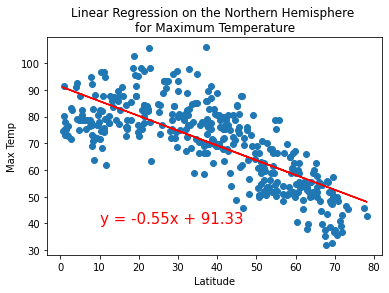

LinregressResult(slope=-0.5532104110041745, intercept=91.32526461395462, rvalue=-0.7506733706351039, pvalue=9.317419614771236e-71, stderr=0.02491119429250091)


In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \nfor Maximum Temperature",
                       "Max Temp", (10,40))

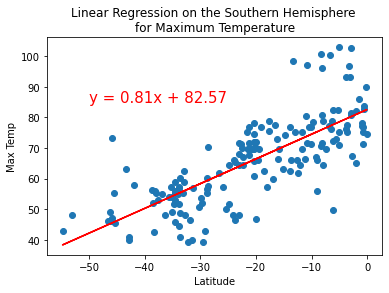

LinregressResult(slope=0.8070355547550951, intercept=82.56624494348218, rvalue=0.7642867811002997, pvalue=1.3443028017397841e-34, stderr=0.051921670427161636)


In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \nfor Maximum Temperature",
                       "Max Temp",(-50,85))

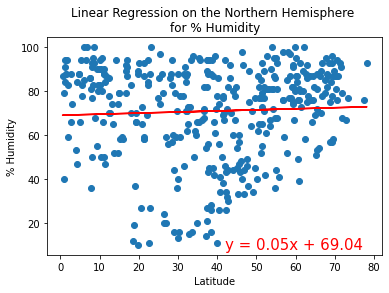

LinregressResult(slope=0.04902565265994923, intercept=69.04013735197097, rvalue=0.04681475777914371, pvalue=0.36024984535404747, stderr=0.053522019879873976)


In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \nfor % Humidity",
                       "% Humidity", (42,8))

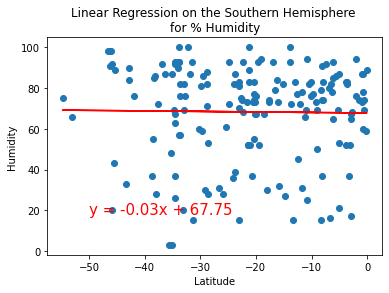

LinregressResult(slope=-0.025264776908016262, intercept=67.75310793014164, rvalue=-0.014561511306725634, pvalue=0.8487565862995956, stderr=0.13228138830151692)


In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \nfor % Humidity",
                       "Humidity",(-50,18))

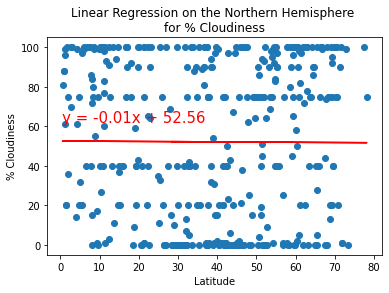

LinregressResult(slope=-0.010711544456335629, intercept=52.557540470799644, rvalue=-0.0055517279719333144, pvalue=0.913648757518182, stderr=0.09871554376642089)


In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \nfor % Cloudiness",
                       "% Cloudiness", (0.5,62))

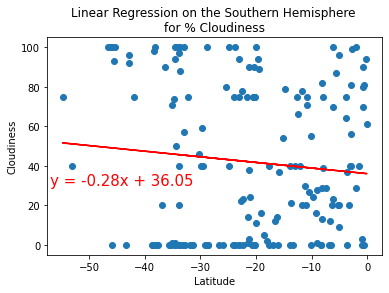

LinregressResult(slope=-0.2839499633447456, intercept=36.053071867065185, rvalue=-0.0998072278536217, pvalue=0.19008331230347678, stderr=0.21584482755980913)


In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \nfor % Cloudiness",
                       "Cloudiness",(-57,30))

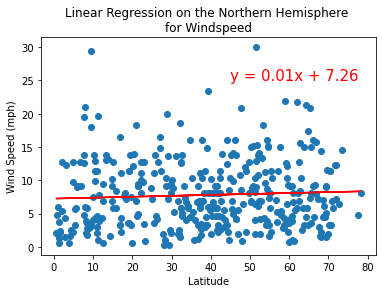

LinregressResult(slope=0.013890875540237328, intercept=7.259660331214695, rvalue=0.05661440763655449, pvalue=0.2684313081700075, stderr=0.012533542986376522)


In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \nfor Windspeed",
                       "Wind Speed (mph)", (45,25))

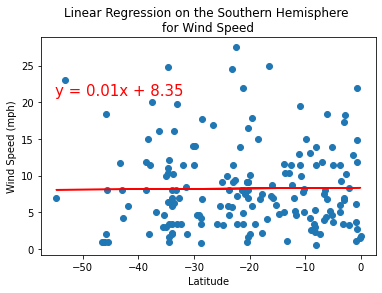

LinregressResult(slope=0.005040337387039662, intercept=8.354226536677436, rvalue=0.011929650298339926, pvalue=0.8758484057192435, stderr=0.0322134148507826)


In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \nfor Wind Speed",
                       "Wind Speed (mph)",(-55,21))